## Clustering with K-means by positions

In [1]:
import pandas as pd
import numpy as np

In [2]:
players_df = pd.read_csv('./complete_playersv2.csv')

In [3]:
players_df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages
0,Brenden Aaronson,USA,"MF,FW",Leeds United,Premier League,21,2000,36,28,"2,372",...,0.15,0.04,0.15,0.15,0.16,0.31,0.15,0.31,57195,2974157
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,37,37,"3,330",...,0.08,0.03,0.08,0.06,0.03,0.09,0.06,0.09,25234,1312153
2,Himad Abdelli,ALG,"MF,FW",Angers,Ligue 1,22,1999,30,24,"2,137",...,0.17,0.08,0.17,0.06,0.12,0.18,0.06,0.18,2523,131215
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,33,33,"2,894",...,0.06,0.03,0.06,0.03,0.05,0.08,0.03,0.08,5678,295234
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,29,28,"2,342",...,0.04,0.00,0.04,0.02,0.05,0.07,0.02,0.07,5047,262431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23,1999,36,35,"3,101",...,0.12,0.03,0.12,0.06,0.06,0.11,0.06,0.11,63084,3280382
2291,Szymon Żurkowski,POL,MF,Fiorentina,Serie A,24,1997,2,0,32,...,2.81,0.00,2.81,0.33,0.06,0.40,0.33,0.40,19556,1016918
2292,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23,1998,37,37,"3,127",...,0.63,0.43,0.63,0.29,0.23,0.52,0.29,0.52,146166,7600623
2293,Milan Đurić,BIH,FW,Hellas Verona,Serie A,32,1990,28,14,"1,366",...,0.13,0.07,0.13,0.09,0.08,0.18,0.09,0.18,18925,984115


In [19]:
# Define the positions
positions = ['MF,FW', 'DF', 'MF', 'FW,MF', 'FW', 'GK', 'DF,FW', 'MF,DF', 'DF,MF']

# Create a mapping of positions to the desired unique positions
position_mapping = {
    'MF,FW': 'MF',
    'DF': 'DF',
    'MF': 'MF',
    'FW,MF': 'FW',
    'FW': 'FW',
    'GK': 'GK',
    'DF,FW': 'DF',
    'MF,DF': 'MF',
    'DF,MF': 'DF'
}

# Map the positions to the desired unique positions
players_df['Pos'] = players_df['Pos'].map(position_mapping)

# Filter the players based on the desired unique positions
unique_positions = ['DF', 'MF', 'FW', 'GK']
filtered_players_df = players_df[players_df['Pos'].isin(unique_positions)]

# Print the filtered players
print(filtered_players_df[['Player', 'Pos']])



                 Player Pos
0      Brenden Aaronson  MF
1      Yunis Abdelhamid  DF
2         Himad Abdelli  MF
3     Salis Abdul Samed  MF
4       Laurent Abergel  MF
...                 ...  ..
2290   Martín Zubimendi  MF
2291   Szymon Żurkowski  MF
2292    Martin Ødegaard  MF
2293        Milan Đurić  FW
2294      Filip Đuričić  MF

[2276 rows x 2 columns]


In [21]:
# players_df.to_csv("complete_players_positions.csv", index=False)

In [22]:
players_df = pd.read_csv('./complete_players_positions.csv')

In [23]:
positions = players_df['Pos'].unique()


In [28]:
positions

array(['MF', 'DF', 'FW', 'GK', nan], dtype=object)

In [24]:
position_data = {}
for position in positions:
    position_data[position] = players_df[players_df['Pos'] == position]


In [25]:
position_data

{'MF':                  Player Nation Pos          Squad             Comp  Age  Born  \
 0      Brenden Aaronson    USA  MF   Leeds United   Premier League   21  2000   
 2         Himad Abdelli    ALG  MF         Angers          Ligue 1   22  1999   
 3     Salis Abdul Samed    GHA  MF           Lens          Ligue 1   22  2000   
 4       Laurent Abergel    FRA  MF        Lorient          Ligue 1   29  1993   
 8      Christian Acella    ITA  MF      Cremonese          Serie A   20  2002   
 ...                 ...    ...  ..            ...              ...  ...   ...   
 2279    Piotr Zieliński    POL  MF         Napoli          Serie A   28  1994   
 2290   Martín Zubimendi    ESP  MF  Real Sociedad          La Liga   23  1999   
 2291   Szymon Żurkowski    POL  MF     Fiorentina          Serie A   24  1997   
 2292    Martin Ødegaard    NOR  MF        Arsenal   Premier League   23  1998   
 2294      Filip Đuričić    SRB  MF      Sampdoria          Serie A   30  1992   
 
       M

Clustering for position: MF


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/4148163572.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = clusters
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: T

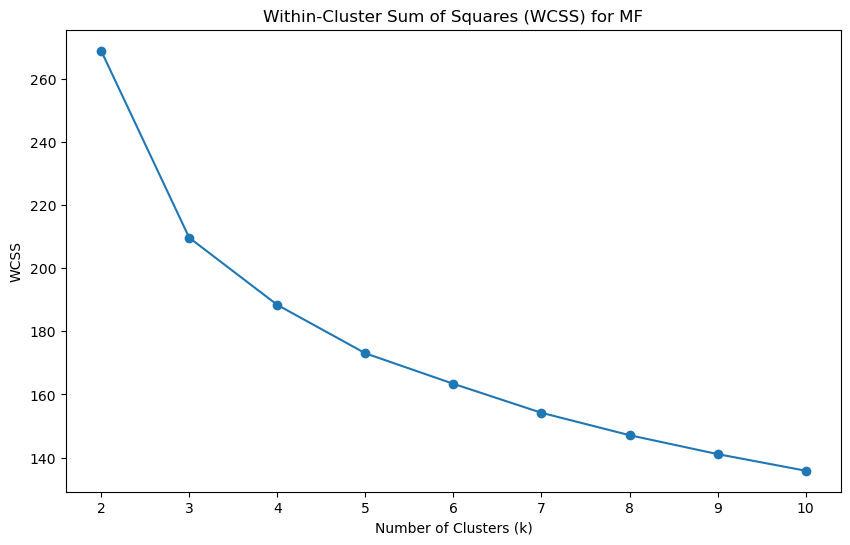

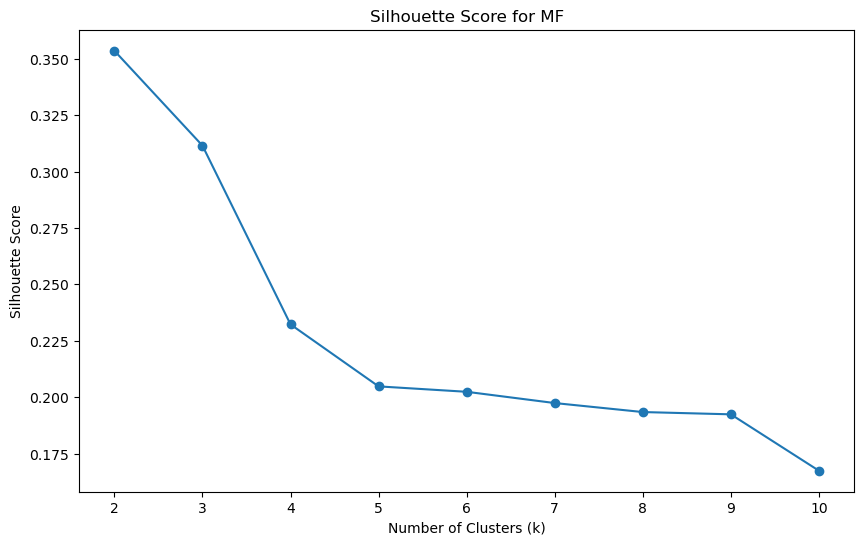

Clustering for position: DF


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/4148163572.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = clusters
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: T

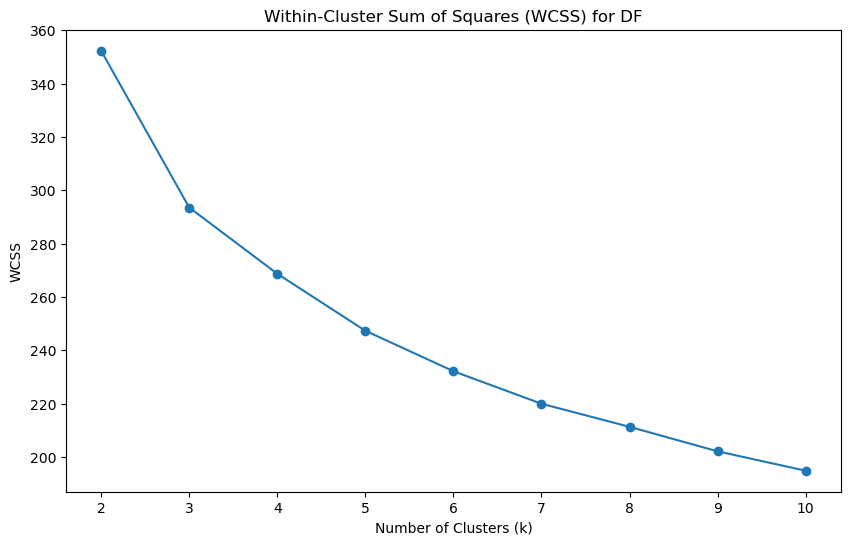

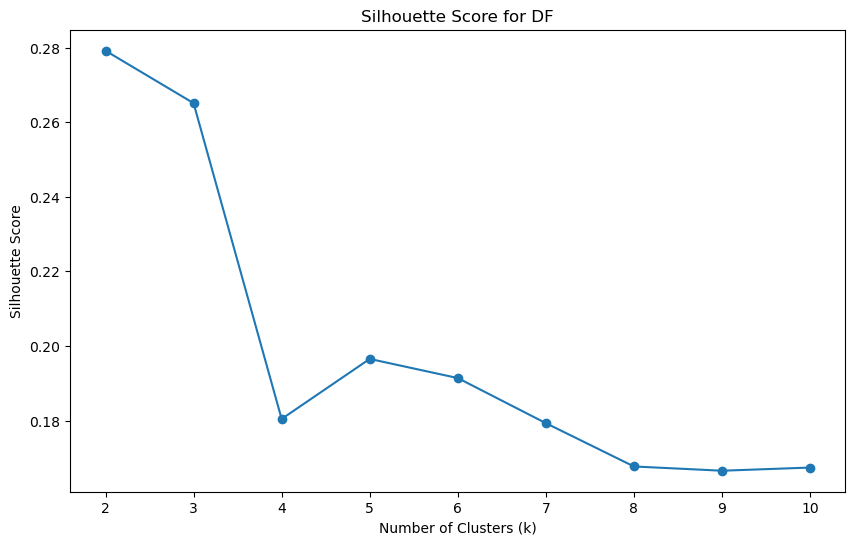

Clustering for position: FW


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/4148163572.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = clusters
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: T

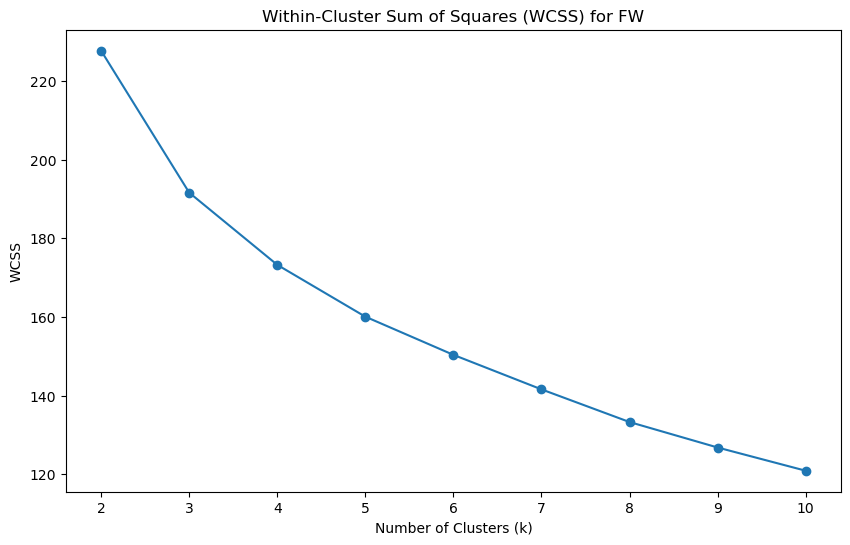

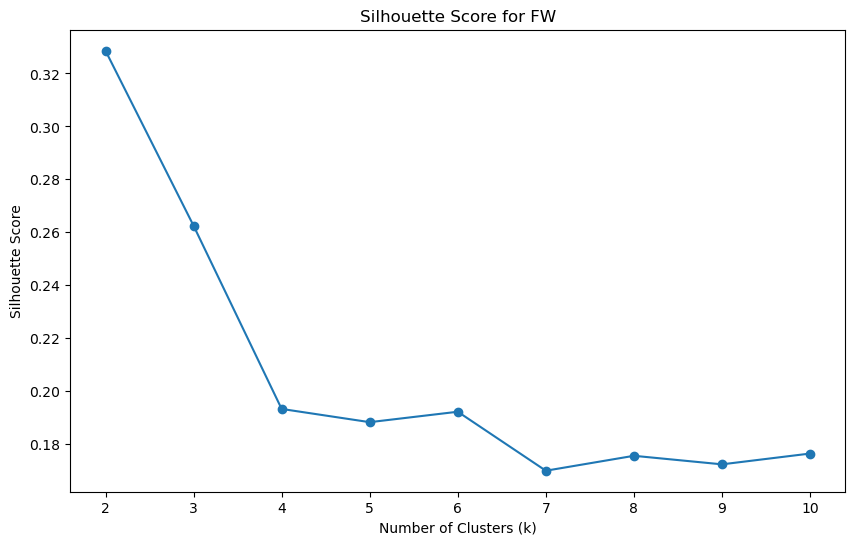

Clustering for position: GK


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/4148163572.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = clusters
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: T

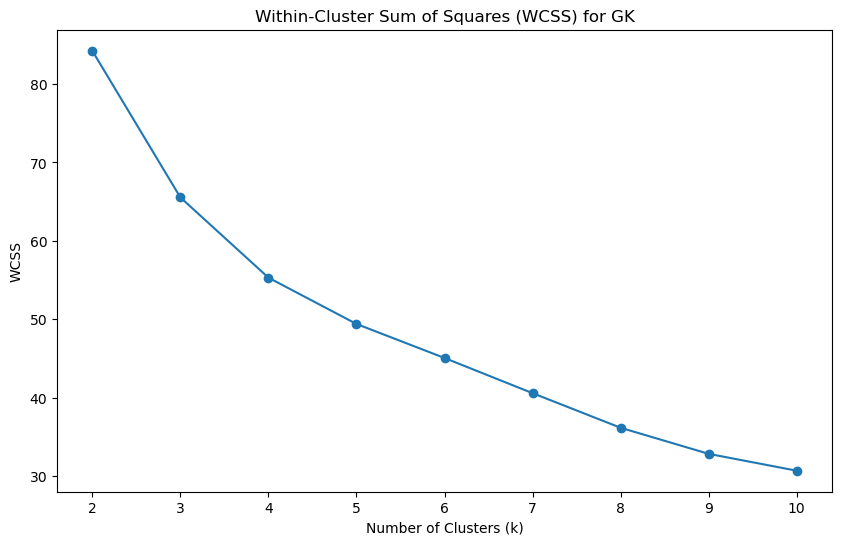

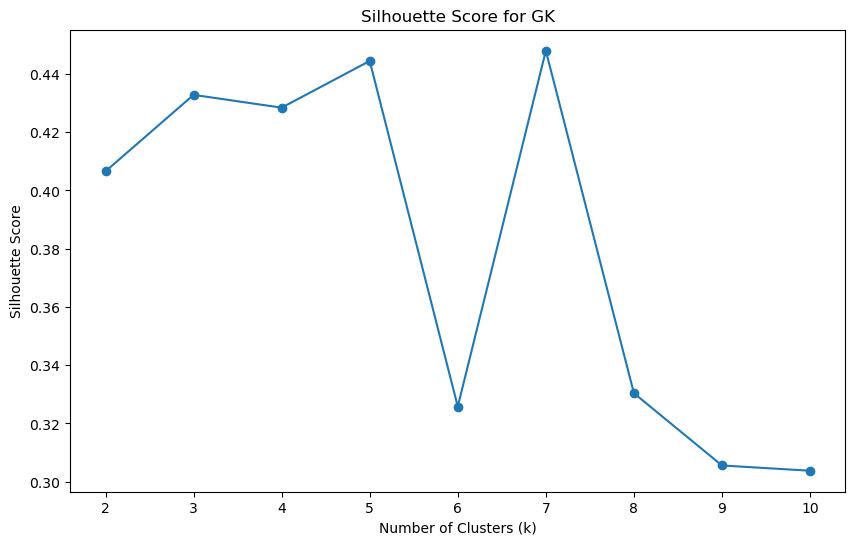

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select the numerical features for clustering
numerical_features = [
    'Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
    'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90',
    'G+A90', 'G-PK90', 'G+A-PK90', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'
]

# Remove commas from numerical features and convert to float
for feature in numerical_features:
    if players_df[feature].dtype == 'O':  # Check if the feature is of object type (string)
        players_df[feature] = players_df[feature].str.replace(',', '').astype(float)

# Perform scaling on the numerical features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(players_df[numerical_features])

# Define the positions
positions = players_df['Pos'].unique()

# Loop over each position
for position in positions:
    print(f"Clustering for position: {position}")
    position_df = players_df[players_df['Pos'] == position]

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(position_df[numerical_features])

    # Add the cluster labels to the dataframe
    position_df['Cluster'] = clusters

    # Evaluate clustering
    def evaluate_clustering(k, X, cluster_labels):
        kmeans = KMeans(n_clusters=k, random_state=50)
        kmeans.fit(X)

        # Calculate WCSS
        wcss = kmeans.inertia_

        # Calculate silhouette score
        silhouette = silhouette_score(X, kmeans.labels_)

        return wcss, silhouette

    # Try different values of k
    k_values = range(2, 11)
    wcss_scores = []
    silhouette_scores = []

    for k in k_values:
        X = position_df[numerical_features].copy()

        # Scale the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        wcss, silhouette = evaluate_clustering(k, X_scaled, position_df['Cluster'])
        wcss_scores.append(wcss)
        silhouette_scores.append(silhouette)

    # Plot the WCSS scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title(f'Within-Cluster Sum of Squares (WCSS) for {position}')
    plt.show()

    # Plot the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {position}')
    plt.show()




In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Define the numerical features for clustering
numerical_features = ['Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
                      'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90',
                      'G+A90', 'G-PK90', 'G+A-PK90', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']

# Set the number of clusters
k = 3

# Iterate over the unique positions
for position in unique_positions:
    # Filter the dataframe for the current position
    position_df = players_df[players_df['Pos'] == position]
    
    # Extract the numerical data for the current position
    
    
    # Scale the data for the current position
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(position_df[numerical_features])
    
    # Perform clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    
    # Get the cluster labels
    cluster_labels = kmeans.labels_
    
    # Add the cluster labels to the dataset
    position_df['Cluster'] = cluster_labels
    
    # Print the cluster assignments for the current position
    print(position_df[['Player', 'Cluster']])


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/404166726.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                   Player  Cluster
1        Yunis Abdelhamid        2
9        Francesco Acerbi        2
11           Marcos Acuña        0
15       Tosin Adarabioyo        2
21       Emmanuel Agbadou        2
...                   ...      ...
2280           David Zima        1
2281  Oleksandr Zinchenko        2
2286         Nadir Zortea        1
2287           Kurt Zouma        2
2289        Igor Zubeldia        2

[847 rows x 2 columns]
                 Player  Cluster
0      Brenden Aaronson        1
2         Himad Abdelli        1
3     Salis Abdul Samed        1
4       Laurent Abergel        1
8      Christian Acella        0
...                 ...      ...
2279    Piotr Zieliński        2
2290   Martín Zubimendi        1
2291   Szymon Żurkowski        0
2292    Martin Ødegaard        2
2294      Filip Đuričić        1

[717 rows x 2 columns]


/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/404166726.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/404166726.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

                 Player  Cluster
5        Matthis Abline        0
6     Zakaria Aboukhlal        2
7         Tammy Abraham        1
10         Mohamed Achi        0
12            Che Adams        1
...                 ...      ...
2278      Edon Zhegrova        1
2282     Joshua Zirkzee        0
2283       Hakim Ziyech        0
2285       Simon Zoller        1
2293        Milan Đurić        0

[520 rows x 2 columns]
                  Player  Cluster
22    Julen Agirrezabala        0
55         Doğan Alemdar        0
61               Alisson        2
105      Alphonse Areola        0
112    Kepa Arrizabalaga        1
...                  ...      ...
2222         Axel Werner        0
2275       Robin Zentner        1
2277    Michael Zetterer        0
2284         Jeroen Zoet        0
2288         Petar Zovko        0

[192 rows x 2 columns]


/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/404166726.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels


In [47]:
# Set the number of clusters
k = 3

# Perform clustering
kmeans.fit(players_df[numerical_features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
players_df['Cluster'] = cluster_labels

# Iterate over the unique positions
for position in unique_positions:
    print("Position:", position)
    
    # Filter the dataframe for the current position
    position_df = players_df[players_df['Pos'] == position]
    
    # Iterate over the clusters
    for cluster in range(k):
        print("Cluster", cluster)
        
        # Get the players in the current cluster for the current position
        cluster_data = position_df[position_df['Cluster'] == cluster]['Player']
        
        # Print the players in the current cluster for the current position
        print(cluster_data)
        print()



Position: DF
Cluster 0
11           Marcos Acuña
15       Tosin Adarabioyo
27           Nayef Aguerd
28          Ruben Aguilar
33        Rayan Aït Nouri
              ...        
2256     Dan-Axel Zagadou
2265    Alessandro Zanoli
2267    Davide Zappacosta
2273        Jordan Zemura
2287           Kurt Zouma
Name: Player, Length: 302, dtype: object

Cluster 1
24               Felix Agu
32                Ola Aina
35         Kristoffer Ajer
60           Faride Alidou
71          Ibrahim Amadou
               ...        
2270    Deyovaisio Zeefuik
2271         Mehdi Zeffane
2272         Aaron Zehnter
2280            David Zima
2286          Nadir Zortea
Name: Player, Length: 268, dtype: object

Cluster 2
1          Yunis Abdelhamid
9          Francesco Acerbi
21         Emmanuel Agbadou
31             Joseph Aidoo
37            Manuel Akanji
               ...         
2252           Maya Yoshida
2254       Mohamed Youssouf
2261        Nicola Zalewski
2281    Oleksandr Zinchenko
2289      

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/950769293.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels


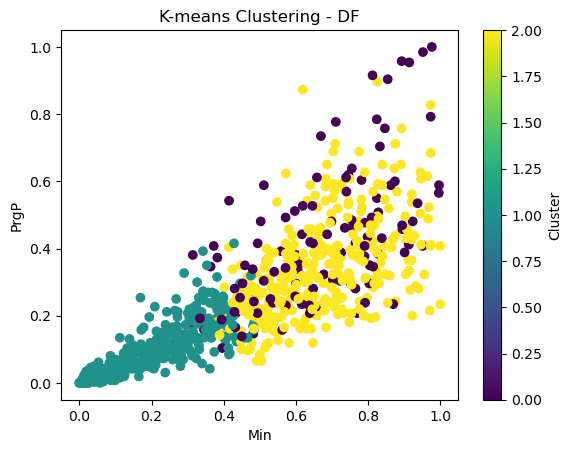

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/950769293.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels


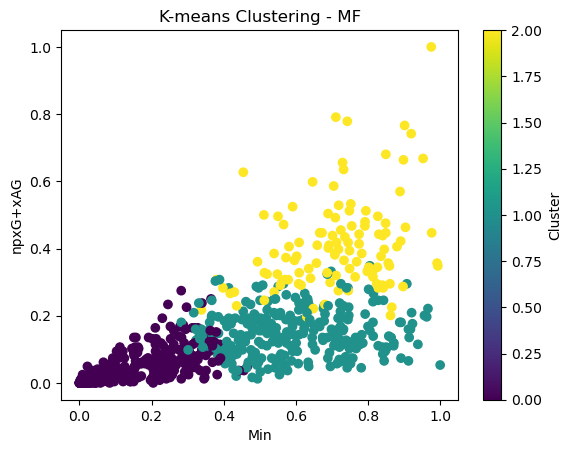

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/950769293.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels


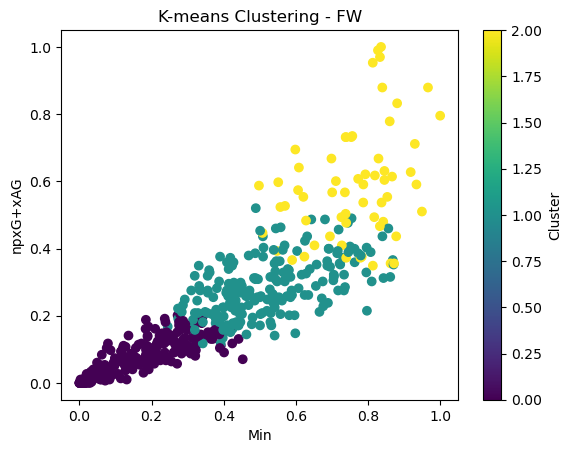

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_84807/950769293.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df['Cluster'] = cluster_labels


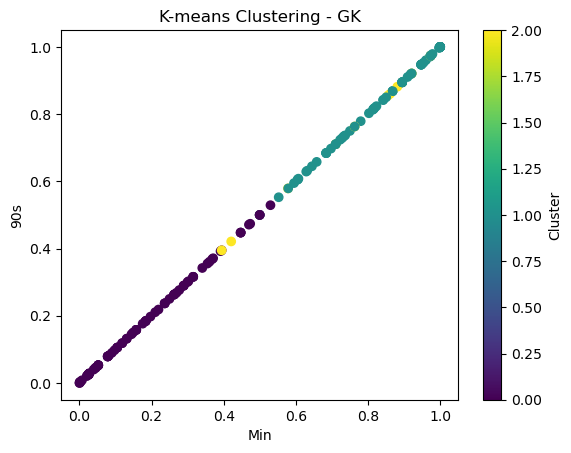

In [60]:
import matplotlib.pyplot as plt

# Define a mapping of position to x and y features
position_features = {
    'DF': ('Min', 'PrgP'),
    'MF': ('Min', 'npxG+xAG'),
    'FW': ('Min', 'npxG+xAG'),
    'GK': ('Min', '90s')
}

# Iterate over the unique positions
for position in unique_positions:
    plt.figure()  # Create a new figure for each position
    
    # Filter the dataframe for the current position
    position_df = players_df[players_df['Pos'] == position]
    
    # Get the corresponding features for x and y axes
    x_feature, y_feature = position_features[position]
    
    # Scale the data for the current position
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(position_df[numerical_features])
    
    # Perform clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Add the cluster labels to the filtered and scaled dataframe
    position_df['Cluster'] = cluster_labels
    
    # Scatter plot for the current position using the scaled data
    plt.scatter(scaled_data[:, numerical_features.index(x_feature)], scaled_data[:, numerical_features.index(y_feature)],
                c=position_df['Cluster'], cmap='viridis')
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'K-means Clustering - {position}')
    plt.colorbar(label='Cluster')
    plt.show()


Enter the player's name (type 'exit' to quit): Lionel Messi
Player: Lionel Messi
Cluster: 2



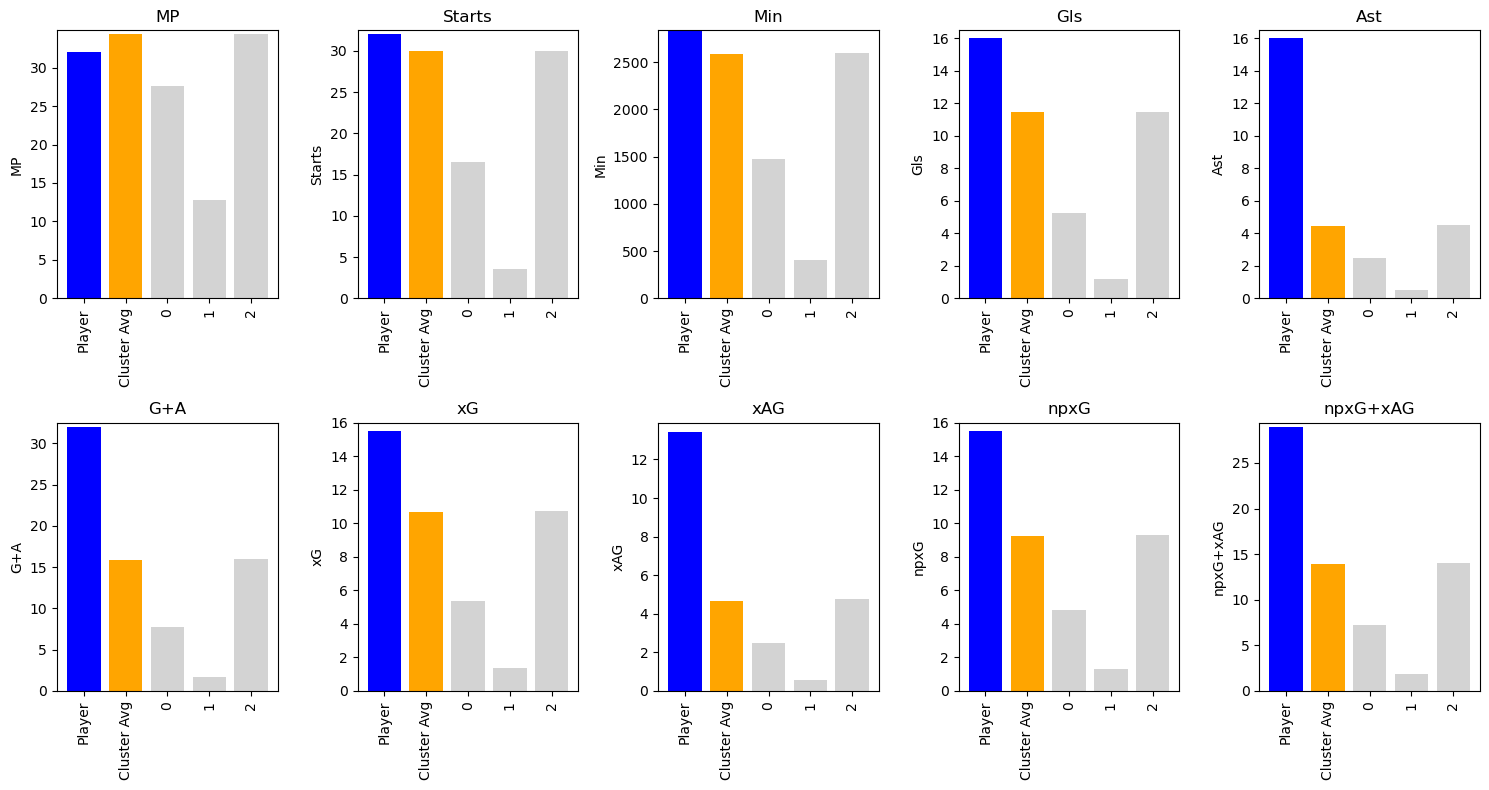

Random Players:
          Player  Age Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
  Sergio Camello   21  FW  38      27 2401.0    6    5   11  7.3  2.4   7.3       9.6
 Folarin Balogun   21  FW  37      34 2999.0   21    2   23 26.6  3.8  21.0      24.8
Antonio Sanabria   26  FW  33      28 2433.0   12    4   16  9.3  3.0   8.5      11.5
  Borja Iglesias   29  FW  35      29 2365.0   15    3   18 14.9  2.8  10.2      13.0
Armand Lauriente   23  FW  28      27 2175.0    7    6   13  4.7  6.2   3.9      10.1


Enter the player's name (type 'exit' to quit): exit


In [70]:
import matplotlib.pyplot as plt
import random

def get_cluster_players(player_name, players_df):
    """Retrieve player's stats, along with five random players of the same position and same cluster,
    and view a graph comparing the player with the cluster stats of the same position and other clusters."""

    # Find the cluster and position of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]
    player_position = player_row['Pos'].values[0]

    # Filter players of the same position and same cluster
    cluster_players = players_df.loc[(players_df['Cluster'] == player_cluster) & (players_df['Pos'] == player_position)]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same position and same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats of the same position
    position_cluster_stats = players_df.loc[players_df['Pos'] == player_position].groupby('Cluster').describe()

    # Print the player's information
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Plot bar graphs comparing the player's stats with the cluster stats of the same position and other clusters
    categories = ['MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_avg = cluster_players[category].mean()
        other_clusters_avgs = position_cluster_stats.loc[:, (category, 'mean')].values
        cluster_labels = [str(label) for label in position_cluster_stats.index]
        x_ticks = ['Player', 'Cluster Avg'] + cluster_labels
        x_values = [player_value, cluster_avg] + list(other_clusters_avgs)
        colors = ['blue', 'orange'] + ['lightgray'] * len(cluster_labels)
        ax.bar(x_ticks, x_values, color=colors)
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_avg, max(other_clusters_avgs)) + 0.5])
        ax.set_xticks(range(len(x_ticks)))
        ax.set_xticklabels(x_ticks, rotation=90)

    plt.tight_layout()
    plt.show()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))


# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break

    if player_name in players_df['Player'].values:
        get_cluster_players(player_name, players_df)
    else:
        print("Player not found.")
    print("\n")  # Add an empty line between each player's information


Enter the player's name (type 'exit' to quit): Lionel Messi
Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  CrdR   xG  npxG  xAG  npxG+xAG  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  G-PK90  G+A-PK90  xG90  xAG90  xG+xAG90  npxG90  npxG+xAG90
Lionel Messi   35 2837.0 31.5   16   16   32    16   0      0     0     0 15.5  15.5 13.4      28.9 114.0 300.0 220.0   0.51   0.51   1.02    0.51      1.02  0.49   0.43      0.92    0.49        0.92




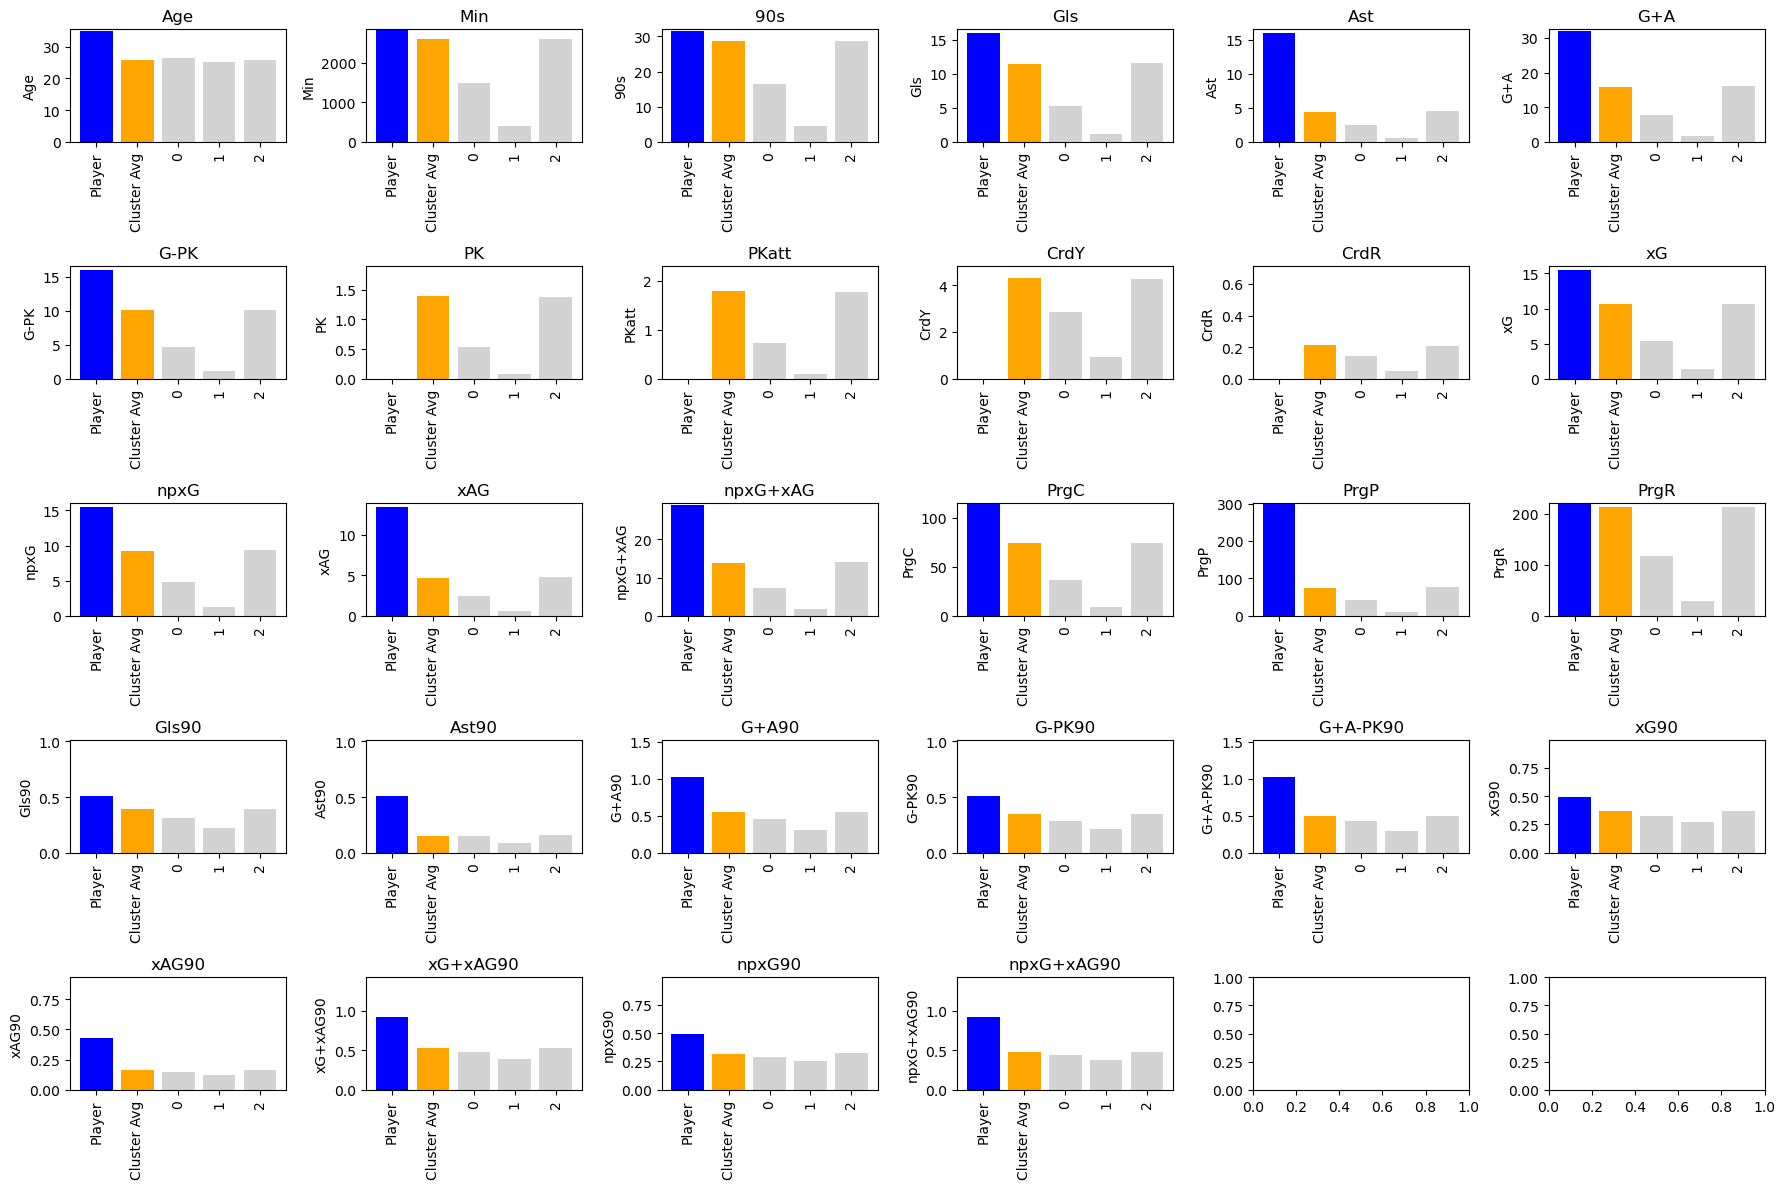

Random Players:
           Player  Age    Min  90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  CrdR  xG  npxG  xAG  npxG+xAG  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  G-PK90  G+A-PK90  xG90  xAG90  xG+xAG90  npxG90  npxG+xAG90
    Gonzalo Plata   21 2302.0 25.6    1    5    6     1   0      0     1     0 3.7   3.7  3.1       6.8  97.0  54.0 213.0   0.04   0.20   0.23    0.04      0.23  0.15   0.12      0.27    0.15        0.27
Manolo Gabbiadini   30 2354.0 26.2    7    2    9     7   0      0     6     0 7.4   7.4  4.5      11.9  32.0  55.0 111.0   0.27   0.08   0.34    0.27      0.34  0.28   0.17      0.45    0.28        0.45
        Junya Ito   29 2916.0 32.4    6    5   11     6   0      0     3     1 5.7   5.7  8.0      13.7 133.0 141.0 338.0   0.19   0.15   0.34    0.19      0.34  0.18   0.25      0.42    0.18        0.42
   Miguel Almirón   28 2491.0 27.7   11    2   13    11   0      0     2     0 8.0   8.0  3.2      11.1  77.0 124.0 264.0   0.40   0.07   0.47    0.40      0.47  0.29  

In [74]:
import matplotlib.pyplot as plt
import random

def get_cluster_players(player_name, players_df):
    """Retrieve player's stats, along with five random players of the same position and same cluster,
    and view a graph comparing the player with the cluster stats of the same position and other clusters."""

    # Find the cluster and position of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]
    player_position = player_row['Pos'].values[0]

    # Filter players of the same position and same cluster
    cluster_players = players_df.loc[(players_df['Cluster'] == player_cluster) & (players_df['Pos'] == player_position)]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same position and same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Player', 'Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
                              'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90',
                              'G+A90', 'G-PK90', 'G+A-PK90', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']]

    # Get the cluster stats of the same position
    position_cluster_stats = players_df.loc[players_df['Pos'] == player_position].groupby('Cluster').describe()

    # Print the player's information
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print("\n")

    # Plot bar graphs comparing the player's stats with the cluster stats of the same position and other clusters
    categories = ['Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
                  'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90',
                  'G+A90', 'G-PK90', 'G+A-PK90', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']
    fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 12))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_avg = cluster_players[category].mean()
        other_clusters_avgs = position_cluster_stats.loc[:, (category, 'mean')].values
        cluster_labels = [str(label) for label in position_cluster_stats.index]
        x_ticks = ['Player', 'Cluster Avg'] + cluster_labels
        x_values = [player_value, cluster_avg] + list(other_clusters_avgs)
        colors = ['blue', 'orange'] + ['lightgray'] * len(cluster_labels)
        ax.bar(x_ticks, x_values, color=colors)
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_avg, max(other_clusters_avgs)) + 0.5])
        ax.set_xticks(range(len(x_ticks)))
        ax.set_xticklabels(x_ticks, rotation=90)

    plt.tight_layout()
    plt.show()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
                          'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90',
                          'G+A90', 'G-PK90', 'G+A-PK90', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']].to_string(index=False))


# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break

    if player_name in players_df['Player'].values:
        get_cluster_players(player_name, players_df)
    else:
        print("Player not found.")
    print("\n")  # Add an empty line between each player's information


Enter the player's name (type 'exit' to quit): Lionel Messi
Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR   xG  xAG  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90
Lionel Messi   35 2837.0   16   16   32     0     0 15.5 13.4 114.0 300.0 220.0   0.51   0.51   1.02




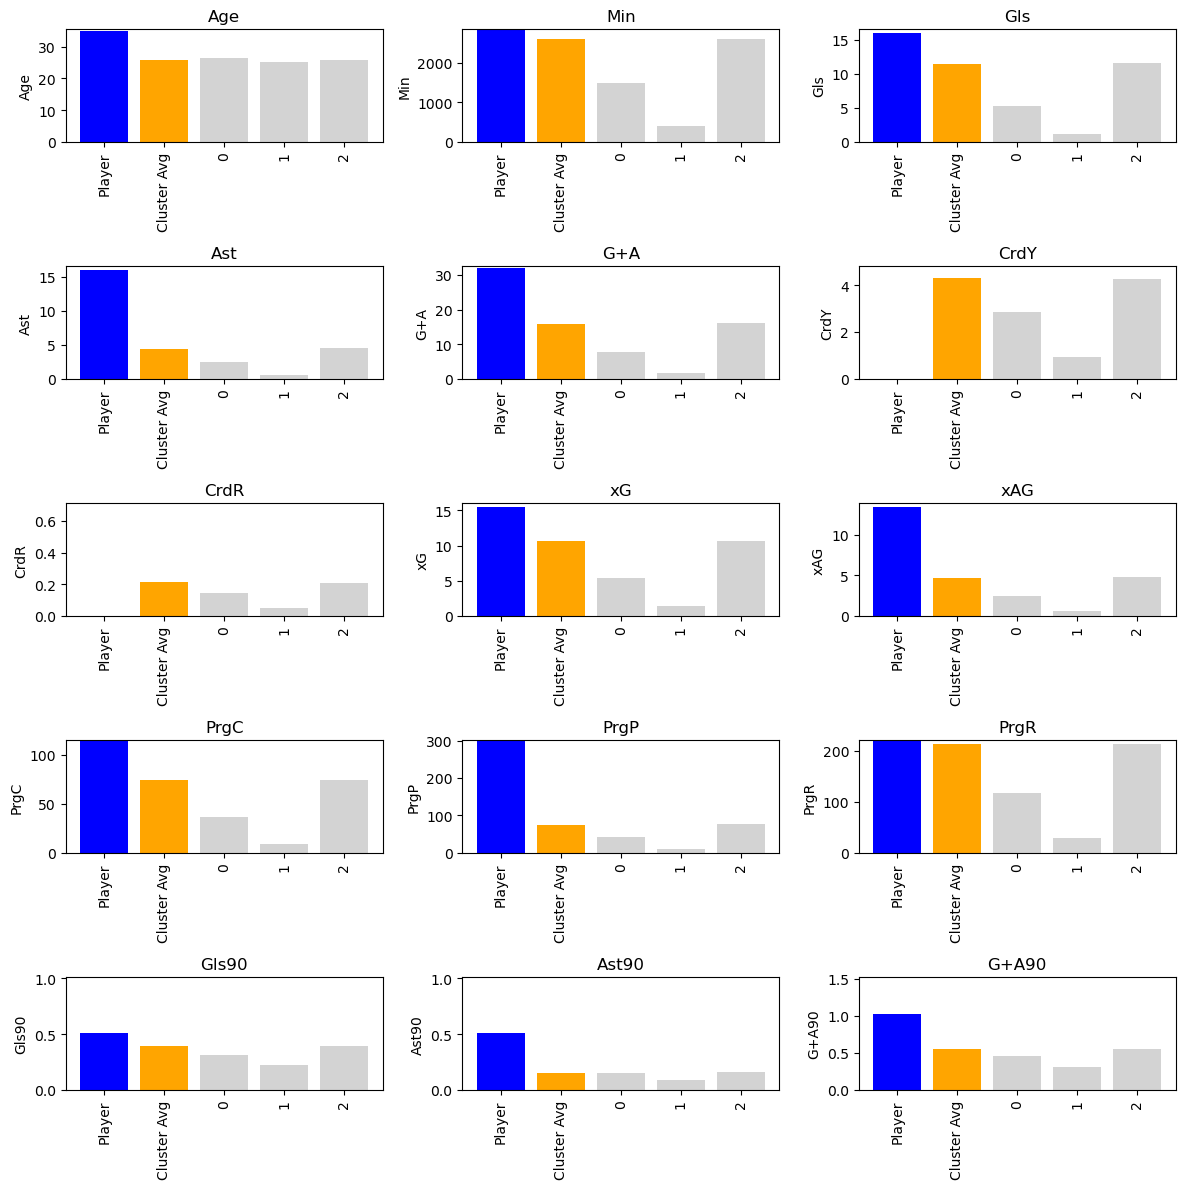

Random Players:
         Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR   xG  xAG  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90
  Borja Mayoral   25 2759.0    8    2   10     4     0  7.9  2.7  58.0  64.0 166.0   0.26   0.07   0.33
Niclas Füllkrug   29 2477.0   16    5   21     4     0 12.8  3.6  41.0  90.0 200.0   0.58   0.18   0.76
   Demarai Gray   26 2507.0    4    1    5     3     0  6.2  3.8  94.0  46.0 199.0   0.14   0.04   0.18
Sheraldo Becker   27 2554.0   11    7   18     4     0  6.5  5.6 105.0  44.0 240.0   0.39   0.25   0.63
 Álex Berenguer   27 2297.0    4    1    5     2     0  4.3  4.6  73.0  77.0 249.0   0.16   0.04   0.20


Enter the player's name (type 'exit' to quit): exit


In [75]:
import matplotlib.pyplot as plt
import random

def get_cluster_players(player_name, players_df):
    """Retrieve player's stats, along with five random players of the same position and same cluster,
    and view a graph comparing the player with the cluster stats of the same position and other clusters."""

    # Find the cluster and position of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]
    player_position = player_row['Pos'].values[0]

    # Filter players of the same position and same cluster
    cluster_players = players_df.loc[(players_df['Cluster'] == player_cluster) & (players_df['Pos'] == player_position)]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same position and same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Player', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY', 'CrdR',
                              'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90']]

    # Get the cluster stats of the same position
    position_cluster_stats = players_df.loc[players_df['Pos'] == player_position].groupby('Cluster').describe()

    # Print the player's information
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print("\n")

    # Plot bar graphs comparing the player's stats with the cluster stats of the same position and other clusters
    categories = ['Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY', 'CrdR',
                  'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90']
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_avg = cluster_players[category].mean()
        other_clusters_avgs = position_cluster_stats.loc[:, (category, 'mean')].values
        cluster_labels = [str(label) for label in position_cluster_stats.index]
        x_ticks = ['Player', 'Cluster Avg'] + cluster_labels
        x_values = [player_value, cluster_avg] + list(other_clusters_avgs)
        colors = ['blue', 'orange'] + ['lightgray'] * len(cluster_labels)
        ax.bar(x_ticks, x_values, color=colors)
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_avg, max(other_clusters_avgs)) + 0.5])
        ax.set_xticks(range(len(x_ticks)))
        ax.set_xticklabels(x_ticks, rotation=90)

    plt.tight_layout()
    plt.show()

    
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY', 'CrdR',
                          'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90']].to_string(index=False))



while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break

    if player_name in players_df['Player'].values:
        get_cluster_players(player_name, players_df)
    else:
        print("Player not found.")
    print("\n")


In [88]:
!pip install fuzzywuzzy

Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Lionel Messi   35 2837.0   16   16   32     0     0 114.0 300.0 220.0   0.51   0.51   1.02  0.49   0.43      0.92




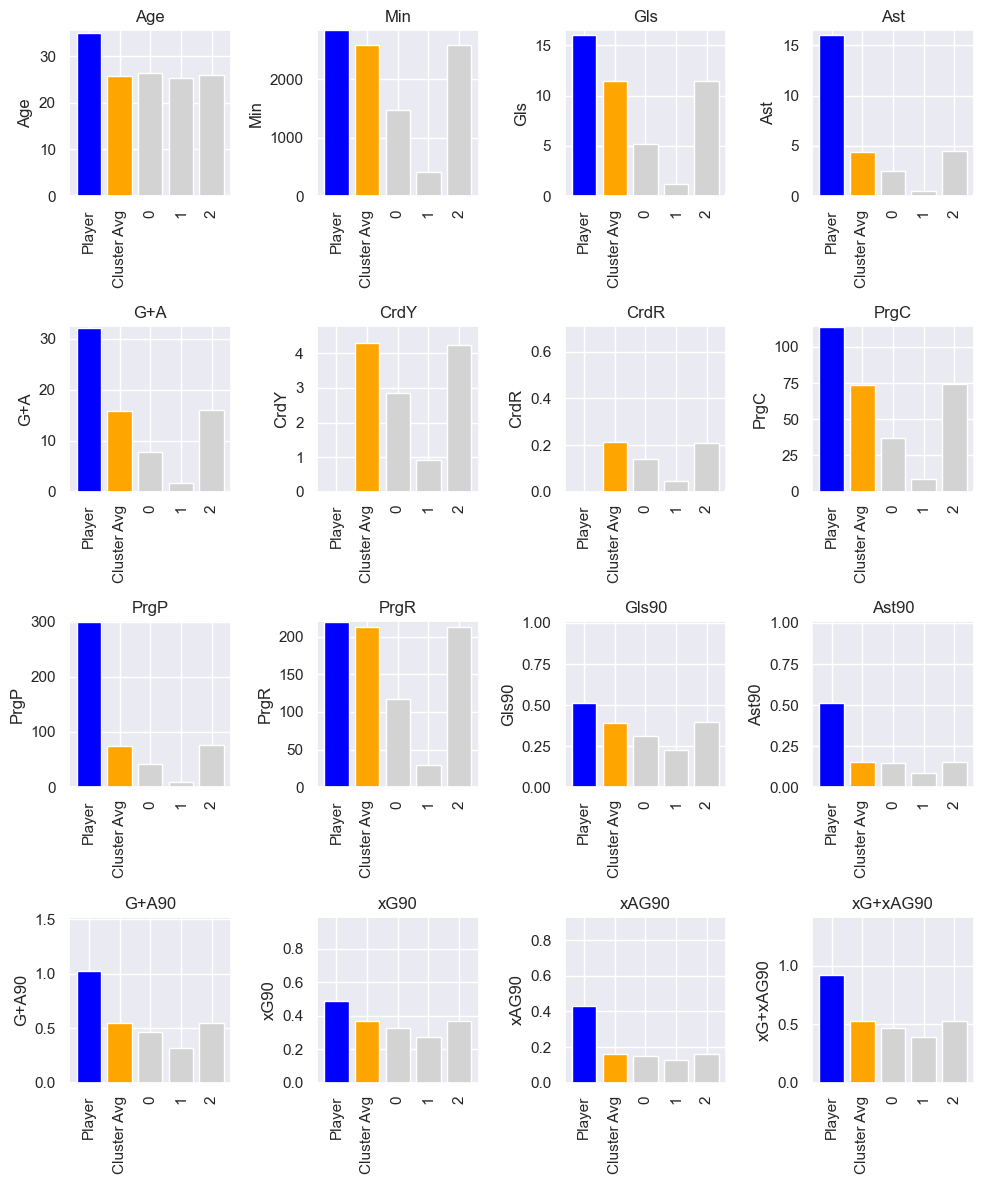

Random Players:
         Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
 Victor Osimhen   23 2566.0   26    4   30     4  28.0 196.0   0.91   0.14   1.05  0.75   0.10      0.85
 Erling Haaland   22 2769.0   36    8   44     5  58.0 151.0   1.17   0.26   1.43  0.92   0.17      1.10
Felipe Anderson   29 2958.0    9    2   11     3 114.0 224.0   0.27   0.06   0.33  0.18   0.15      0.33
 Alexis Sánchez   33 2679.0   14    3   17     3 127.0 232.0   0.47   0.10   0.57  0.42   0.20      0.62
 Jonathan Bamba   26 2783.0    6    7   13     6 146.0 345.0   0.19   0.23   0.42  0.27   0.21      0.47
Player: Erling Haaland
Cluster: 2

Player Stats:
        Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Erling Haaland   22 2769.0   36    8   44     5     0  35.0  58.0 151.0   1.17   0.26   1.43  0.92   0.17       1.1




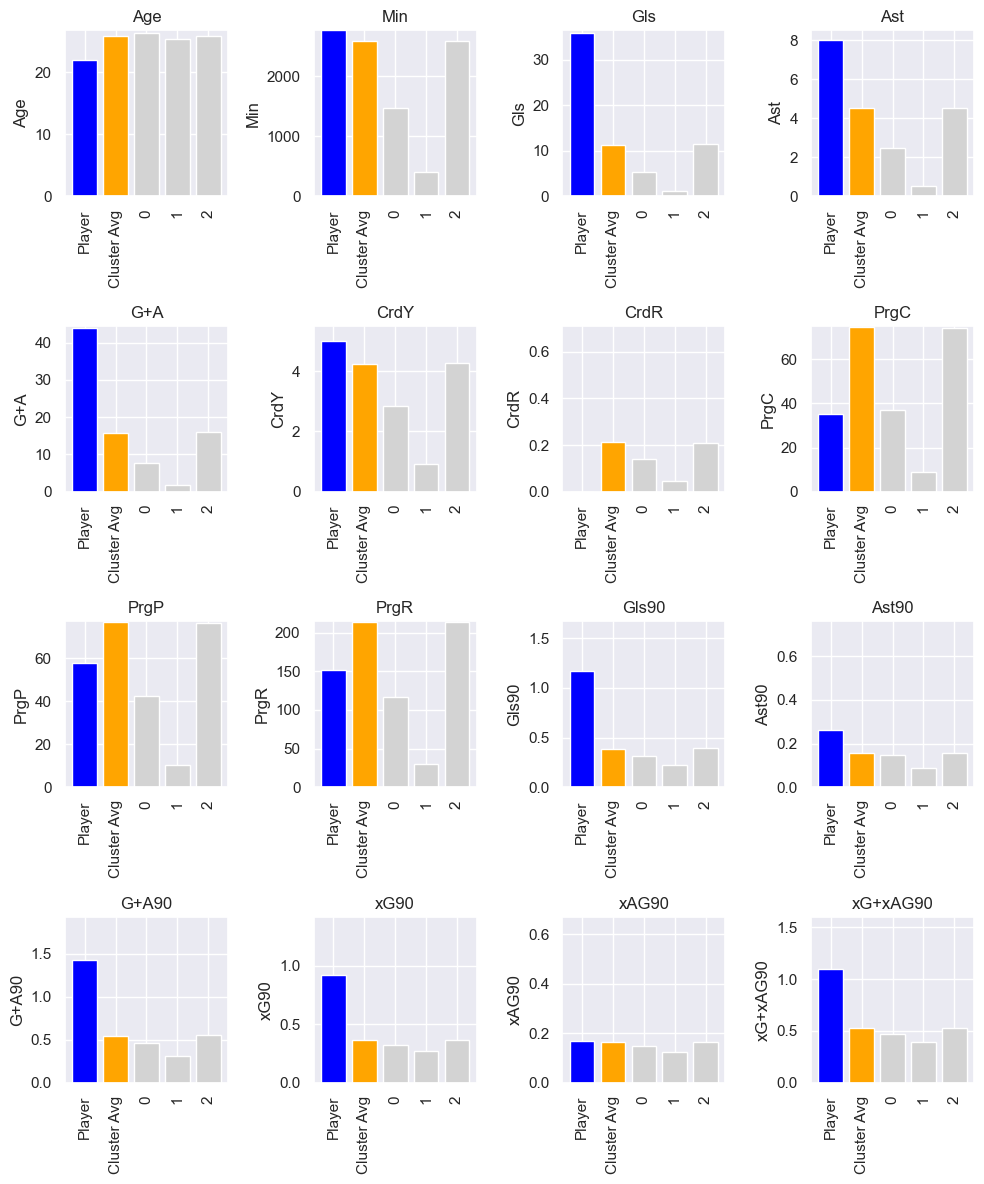

Random Players:
             Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
   Antonio Sanabria   26 2433.0   12    4   16     4  46.0 139.0   0.44   0.15   0.59  0.34   0.11      0.45
Alexandre Lacazette   31 2929.0   27    5   32     3 108.0 227.0   0.83   0.15   0.98  0.74   0.16      0.91
       Lionel Messi   35 2837.0   16   16   32     0 300.0 220.0   0.51   0.51   1.02  0.49   0.43      0.92
     Sergio Camello   21 2401.0    6    5   11     1  42.0 122.0   0.22   0.19   0.41  0.27   0.09      0.36
    Felipe Anderson   29 2958.0    9    2   11     3 114.0 224.0   0.27   0.06   0.33  0.18   0.15      0.33
Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Lionel Messi   35 2837.0   16   16   32     0     0 114.0 300.0 220.0   0.51   0.51   1.02  0.49   0.43      0.92




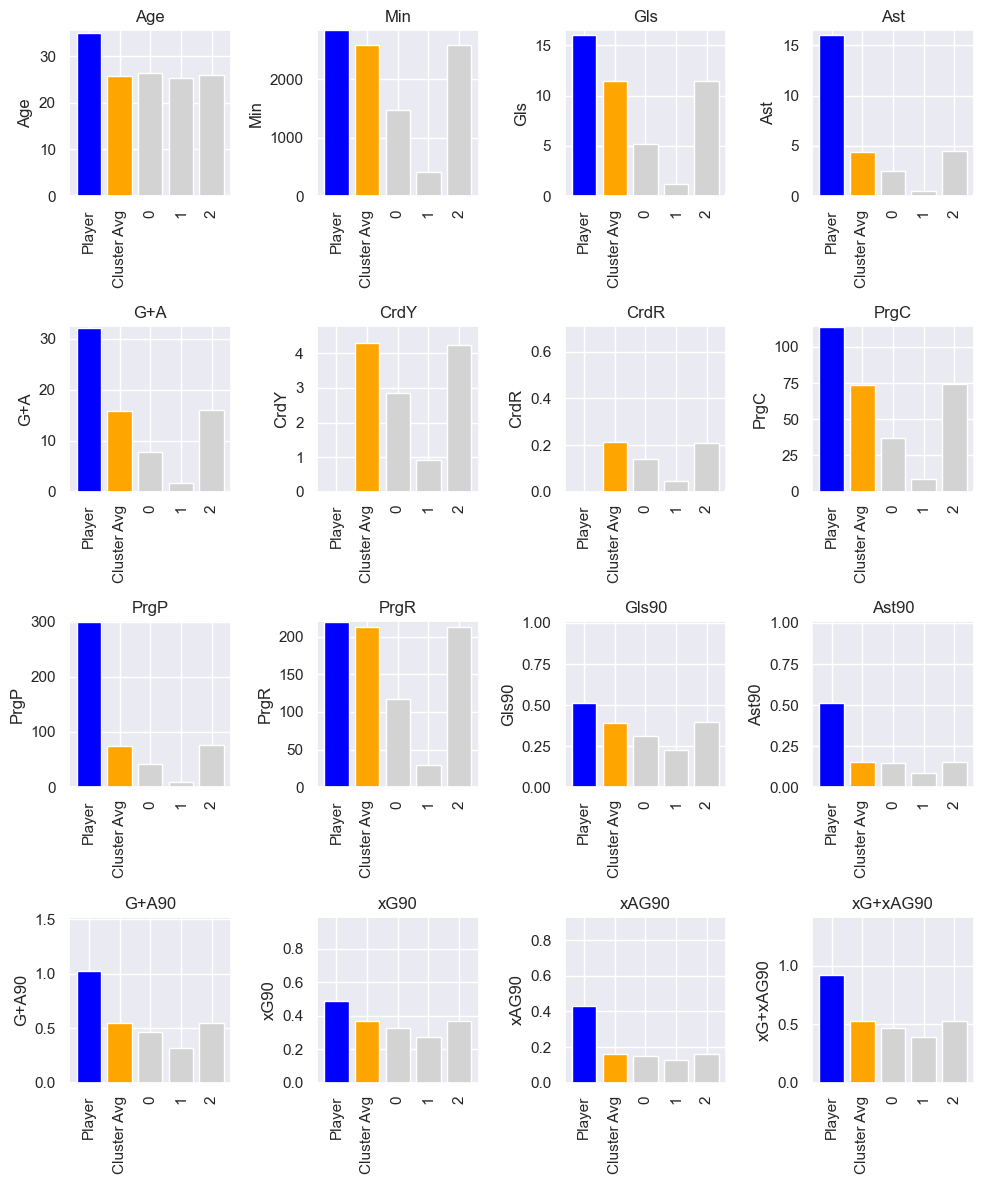

Random Players:
        Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
  Bryan Mbeumo   22 2906.0    9    8   17     5  88.0 235.0   0.28   0.25   0.53  0.30   0.23      0.54
 Kévin Gameiro   35 2098.0   10    0   10     1  69.0 158.0   0.43   0.00   0.43  0.34   0.14      0.49
 Álvaro García   29 2870.0    5    5   10     7  71.0 293.0   0.16   0.16   0.31  0.11   0.18      0.29
Miguel Almirón   28 2491.0   11    2   13     2 124.0 264.0   0.40   0.07   0.47  0.29   0.11      0.40
  Demarai Gray   26 2507.0    4    1    5     3  46.0 199.0   0.14   0.04   0.18  0.22   0.14      0.36


In [147]:
players_df.to_csv("clustered_positions.csv", index=False)

Enter the player's name (type 'exit' to quit): lionel mssi
Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Lionel Messi   35 2837.0   16   16   32     0     0 114.0 300.0 220.0   0.51   0.51   1.02  0.49   0.43      0.92




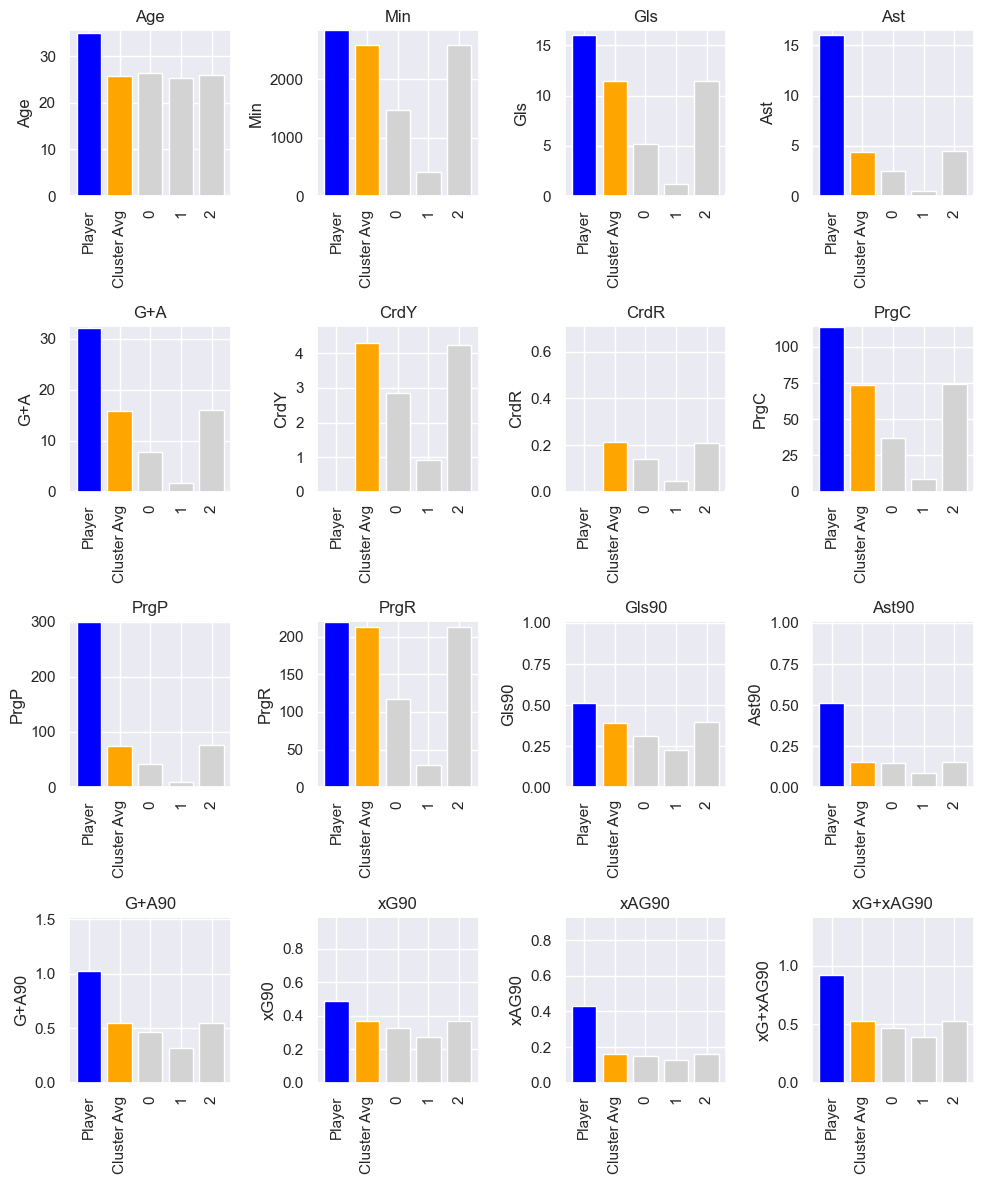

Random Players:
            Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
       Moses Simon   27 2346.0    5    4    9     3  62.0 218.0   0.19   0.15   0.35  0.18   0.14      0.31
Mounaim El Idrissy   23 2497.0    6    0    6    10  40.0 173.0   0.22   0.00   0.22  0.26   0.03      0.30
    Victor Osimhen   23 2566.0   26    4   30     4  28.0 196.0   0.91   0.14   1.05  0.75   0.10      0.85
       Kai Havertz   23 2569.0    7    1    8     5  89.0 218.0   0.25   0.04   0.28  0.41   0.13      0.54
    Sergio Camello   21 2401.0    6    5   11     1  42.0 122.0   0.22   0.19   0.41  0.27   0.09      0.36


Enter the player's name (type 'exit' to quit): exit
Player: Lionel Messi
Cluster: 2

Player Stats:
      Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Lionel Messi   35 2837.0   16   16   32     0     0 114.0 300.0 220.0   0.51   0.51   1.02  0.49   0.43      0.92




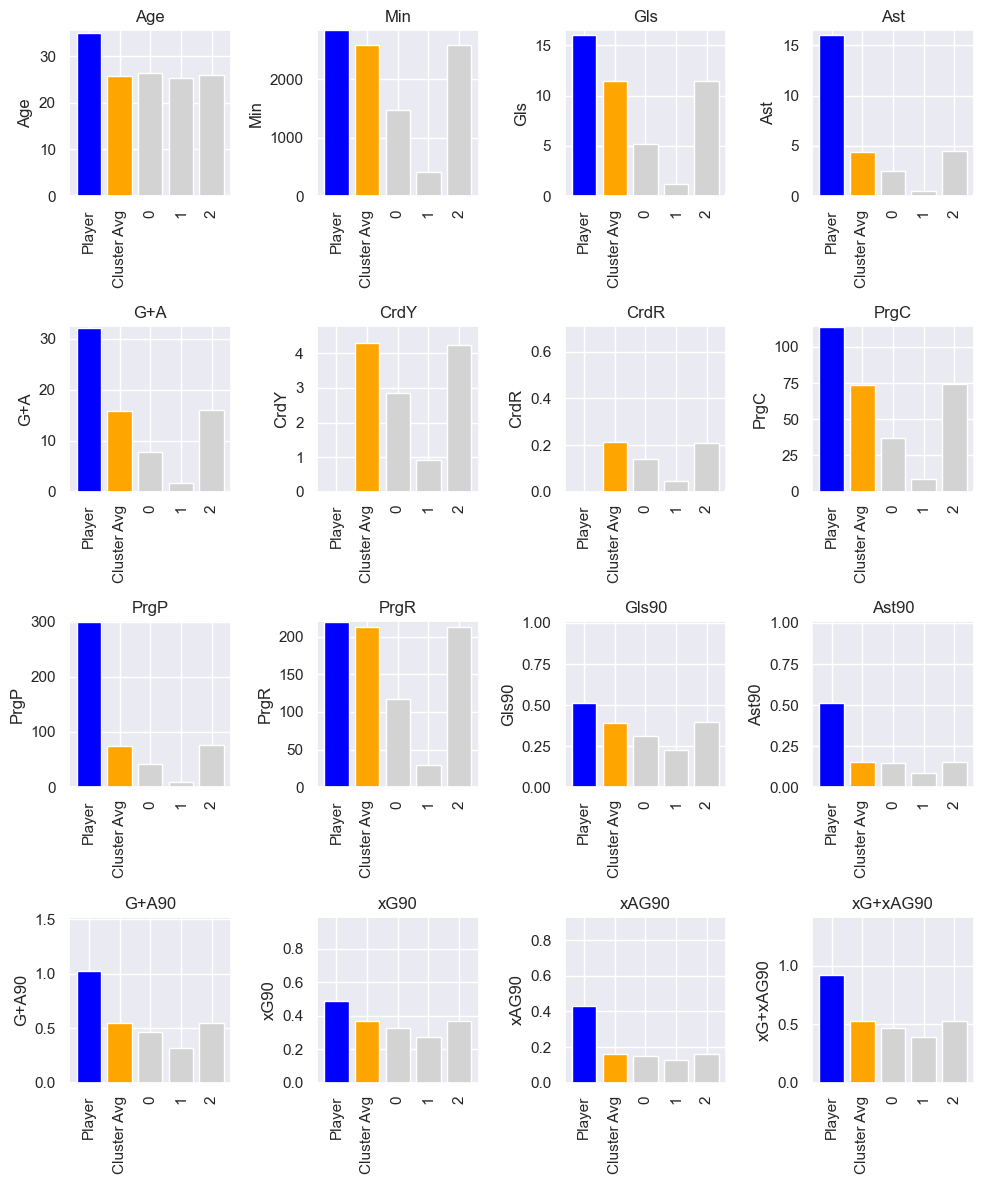

Random Players:
               Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
              Willian   33 2126.0    5    5   10     2 113.0 152.0   0.21   0.21   0.42  0.14   0.19      0.33
        Arnaud Nordin   24 2401.0    9    3   12     4  63.0 181.0   0.34   0.11   0.45  0.24   0.11      0.35
          Loïs Openda   22 2517.0   21    4   25     2  42.0 206.0   0.75   0.14   0.89  0.66   0.15      0.81
        Marcus Thuram   24 2513.0   13    6   19     3  46.0 170.0   0.47   0.21   0.68  0.59   0.19      0.78
Khvicha Kvaratskhelia   21 2518.0   12   10   22     1  91.0 291.0   0.43   0.36   0.79  0.29   0.27      0.56


In [145]:
import matplotlib.pyplot as plt
import random
from fuzzywuzzy import process
import seaborn as sns
sns.set()
def get_closest_match(player_name, players_df):
    """Find the closest matching player name using fuzzy matching."""
    player_names = players_df['Player'].values
    closest_match = process.extractOne(player_name, player_names)
    return closest_match[0]

def get_cluster_players(player_name, players_df):
    """Retrieve player's stats, along with five random players of the same position and same cluster,
    and view a graph comparing the player with the cluster stats of the same position and other clusters."""

    # Find the cluster and position of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]
    player_position = player_row['Pos'].values[0]

    # Filter players of the same position and same cluster
    cluster_players = players_df.loc[(players_df['Cluster'] == player_cluster) & (players_df['Pos'] == player_position)]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same position and same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Player', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY', 'CrdR',
                               'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'xG90', 'xAG90', 'xG+xAG90']]

    # Get the cluster stats of the same position
    position_cluster_stats = players_df.loc[players_df['Pos'] == player_position].groupby('Cluster').describe()

    # Print the player's information
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print("\n")

    # Plot bar graphs comparing the player's stats with the cluster stats of the same position and other clusters
    categories = ['Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY', 'CrdR',
                  'PrgC', 'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'xG90', 'xAG90', 'xG+xAG90']
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 12))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_avg = cluster_players[category].mean()
        other_clusters_avgs = position_cluster_stats.loc[:, (category, 'mean')].values
        cluster_labels = [str(label) for label in position_cluster_stats.index]
        x_ticks = ['Player', 'Cluster Avg'] + cluster_labels
        x_values = [player_value, cluster_avg] + list(other_clusters_avgs)
        colors = ['blue', 'orange'] + ['lightgray'] * len(cluster_labels)
        ax.bar(x_ticks, x_values, color=colors)
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_avg, max(other_clusters_avgs)) + 0.5])
        ax.set_xticks(range(len(x_ticks)))
        ax.set_xticklabels(x_ticks, rotation=90)

    plt.tight_layout()
    plt.show()

   
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Min', 'Gls', 'Ast', 'G+A', 'CrdY',
                          'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'xG90', 'xAG90', 'xG+xAG90']].to_string(index=False))



while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break

    closest_match = get_closest_match(player_name, players_df)
    
    if closest_match in players_df['Player'].values:
        get_cluster_players(closest_match, players_df)
    else:
        print("Player not found.")
    print("\n")


In [140]:
import pandas as pd
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
from fuzzywuzzy import process


In [141]:
app = dash.Dash(__name__)


In [142]:
app.layout = html.Div([
    html.H1("Player Analysis"),
    dcc.Input(id='player-name-input', type='text', placeholder='Enter player name'),
    html.Button('Submit', id='submit-button', n_clicks=0),
    html.Div(id='analysis-output')
])


In [143]:
@app.callback(
    Output('analysis-output', 'children'),
    Input('submit-button', 'n_clicks'),
    State('player-name-input', 'value')
)
def analyze_player(n_clicks, player_name):
    if n_clicks > 0:
        closest_match = get_closest_match(player_name, players_df)

        if closest_match in players_df['Player'].values:
            return get_cluster_players(closest_match, players_df)

        return "Player not found."



Player: Ederson
Cluster: 2

Player Stats:
 Player  Age    Min  Gls  Ast  G+A  CrdY  CrdR  PrgC  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
Ederson   28 3150.0    0    1    1     3     0   0.0   0.0   0.0    0.0   0.03   0.03   0.0   0.01      0.01




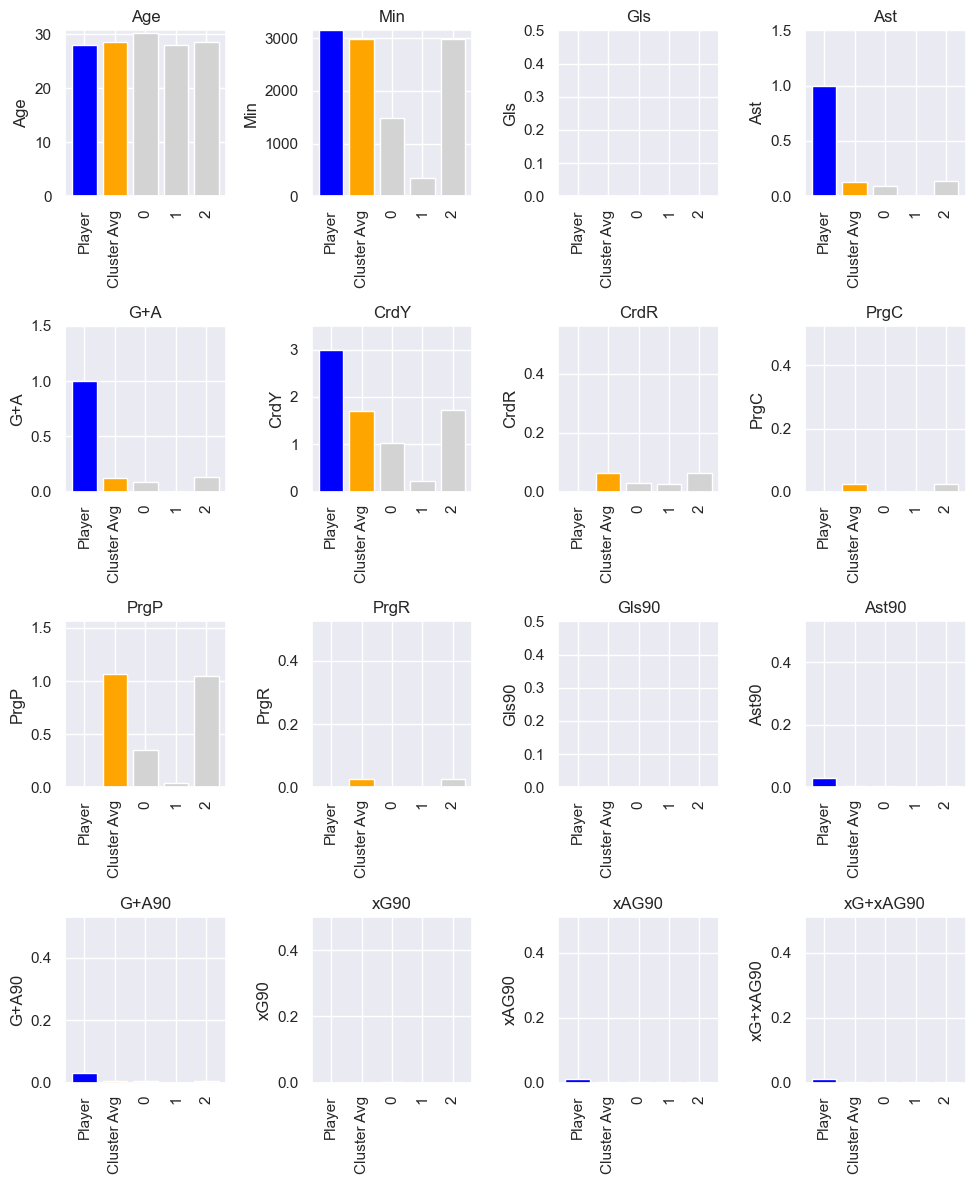

Random Players:
         Player  Age    Min  Gls  Ast  G+A  CrdY  PrgP  PrgR  Gls90  Ast90  G+A90  xG90  xAG90  xG+xAG90
 Oliver Baumann   32 3060.0    0    0    0     2   1.0   0.0    0.0   0.00   0.00   0.0   0.00      0.00
 Manuel Riemann   33 3060.0    0    0    0     3  18.0   0.0    0.0   0.00   0.00   0.0   0.00      0.00
   Rui Patrício   34 3150.0    0    0    0     1   0.0   0.0    0.0   0.00   0.00   0.0   0.00      0.00
      Pau López   27 2925.0    0    2    2     3   2.0   0.0    0.0   0.06   0.06   0.0   0.01      0.01
Andrea Consigli   35 3150.0    0    0    0     0   1.0   0.0    0.0   0.00   0.00   0.0   0.00      0.00


In [144]:
if __name__ == '__main__':
    app.run_server(port=8052, debug=True)
